In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import nltk
from collections  import Counter
import seaborn as sns
from unicodedata import normalize

nltk.download('punkt')
nltk.download('stopwords')
plt.style.use('ggplot')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Funções de tratamento de dados
def convert_decimal_salary(x):
  x = str(x).replace(',','.').replace('$','')
  return float(x)

def is_none_experience(x):
  if x is None or str(x).upper() == 'NAN':
    return 'ZERO'
  return x.upper()

def convert_date_opendate(x):
  x = datetime.strptime(str(x), '%Y-%m-%d')
  return x

def convert_date_deadline(x):
  if str(x).upper() == 'NAN':
    return None

  x = str(x).upper().replace('JANUARY','01,').replace('FEBRUARY','02,').replace('MARCH','03,').replace('APRIL','04,').replace('MAY','05,').replace('JUNE','06,').replace('JULY','07,').replace('AUGUST','08,').replace('SEPTEMBER','09,').replace('OCTOBER','10,').replace('NOVEMBER','11,').replace('DECEMBER','12,').replace(' ','')
  x = datetime.strptime(x, '%m,%d,%Y')
  return x

def convert_experience_length(x):
  x = str(x).upper().replace('ONE','1').replace('TWO','2').replace('THREE','3').replace('FOUR','4').replace('FIVE','5').replace('SIX','6').replace('SEVEN','7').replace('ZERO','0')
  if str(x) == 'NAN':
    return 0

  return int(x)

In [ ]:
#Tratando colunas
df_job_class = pd.read_csv('/content/sample_data/job class output.csv')
df_job_class.salary_start = df_job_class.salary_start.apply(convert_decimal_salary)
df_job_class.salary_end = df_job_class.salary_end.apply(convert_decimal_salary)
df_job_class.opendate = df_job_class.opendate.apply(convert_date_opendate)
df_job_class.deadline = df_job_class.deadline.apply(convert_date_deadline)
df_job_class.EXPERIENCE_LENGTH = df_job_class.EXPERIENCE_LENGTH.apply(is_none_experience)
df_job_class['Experience_length_int'] = df_job_class.EXPERIENCE_LENGTH.apply(convert_experience_length)
df_job_class.head(5)

,Unnamed: 0,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,selection,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,Experience_length_int
0,0,WATER SERVICE REPRESENTATIVE 1693 111717.txt,water service representative,70.177,87.194,2017-11-17,Three years of full-time paid experience in a ...,A Water Service Representative makes field inv...,2017-11-30,['Test'],THREE,FULL_TIME,NaN,NaN,3
1,1,HARBOR PLANNING AND ECONOMIC ANALYST 9224 1118...,harbor planning and economic analyst,70.908,103.648,2016-11-18,1. Graduation from an accredited four-year col...,A Harbor Planning and Economic Analyst perform...,2016-12-08,['Questionnaire'],TWO,FULL_TIME,four,College or University,2
2,2,MANAGING WATER UTILITY ENGINEER 9406 032417 RE...,managing water utility engineer,148.561,184.579,2017-03-24,1. Two years of full-time paid experience at t...,A Managing Water Utility Engineer may serve as...,2017-04-13,"['Essay', 'Interview']",TWO,FULL_TIME,NaN,NaN,2
3,3,VETERINARY TECHNICIAN 2369 020599 REV 120417.txt,veterinary technician,50.425,73.706,1999-02-05,A Registered Veterinary Technician (RVT) certi...,A Veterinary Technician assists a Veterinarian...,NaT,['Review'],ZERO,NaN,NaN,NaN,0
4,4,SENIOR UTILITY SERVICES SPECIALIST 3573 113018...,senior utility services specialist,117.199,145.596,2018-11-30,Two years of full-time paid experience with th...,"A Senior Utility Services Specialist assigns, ...",2018-12-13,"['Essay', 'Interview']",TWO,FULL_TIME,NaN,NaN,2


In [ ]:
#Criar coluna auxiliar para contagem e remoção de stop words
stop = nltk.corpus.stopwords.words('english')
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

df_job_class['AuxCount'] = 1
df_job_class['requirements_no_stopwords'] = df_job_class['requirements'].apply(lambda x: ' '.join([word for word in tokenizer.tokenize(x) if word not in (stop)]))
df_job_class['duties_no_stopwords'] = df_job_class['duties'].apply(lambda x: ' '.join([word for word in tokenizer.tokenize(x) if word not in (stop)]))
df_job_class['position_no_stopwords'] = df_job_class['Position'].apply(lambda x: ' '.join([word for word in tokenizer.tokenize(x) if word not in (stop)]))
df_job_class

,Unnamed: 0,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,selection,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,Experience_length_int,AuxCount,requirements_no_stopwords,duties_no_stopwords,position_no_stopwords
0,0,WATER SERVICE REPRESENTATIVE 1693 111717.txt,water service representative,70.177,87.194,2017-11-17,Three years of full-time paid experience in a ...,A Water Service Representative makes field inv...,2017-11-30,['Test'],THREE,FULL_TIME,NaN,NaN,3,1,Three years full time paid experience class le...,A Water Service Representative makes field inv...,water service representative
1,1,HARBOR PLANNING AND ECONOMIC ANALYST 9224 1118...,harbor planning and economic analyst,70.908,103.648,2016-11-18,1. Graduation from an accredited four-year col...,A Harbor Planning and Economic Analyst perform...,2016-12-08,['Questionnaire'],TWO,FULL_TIME,four,College or University,2,1,1 Graduation accredited four year college univ...,A Harbor Planning Economic Analyst performs pl...,harbor planning economic analyst
2,2,MANAGING WATER UTILITY ENGINEER 9406 032417 RE...,managing water utility engineer,148.561,184.579,2017-03-24,1. Two years of full-time paid experience at t...,A Managing Water Utility Engineer may serve as...,2017-04-13,"['Essay', 'Interview']",TWO,FULL_TIME,NaN,NaN,2,1,1 Two years full time paid experience level Wa...,A Managing Water Utility Engineer may serve di...,managing water utility engineer
3,3,VETERINARY TECHNICIAN 2369 020599 REV 120417.txt,veterinary technician,50.425,73.706,1999-02-05,A Registered Veterinary Technician (RVT) certi...,A Veterinary Technician assists a Veterinarian...,NaT,['Review'],ZERO,NaN,NaN,NaN,0,1,A Registered Veterinary Technician RVT certifi...,A Veterinary Technician assists Veterinarian p...,veterinary technician
4,4,SENIOR UTILITY SERVICES SPECIALIST 3573 113018...,senior utility services specialist,117.199,145.596,2018-11-30,Two years of full-time paid experience with th...,"A Senior Utility Services Specialist assigns, ...",2018-12-13,"['Essay', 'Interview']",TWO,FULL_TIME,NaN,NaN,2,1,Two years full time paid experience City Los A...,A Senior Utility Services Specialist assigns r...,senior utility services specialist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,655,PLUMBER SUPERVISOR 3446 100518.txt,plumber supervisor,108.482,NaN,2018-10-05,1. Four years of full-time paid experience as ...,"A Plumber Supervisor assigns, reviews and eval...",2018-10-18,['Interview'],FOUR,FULL_TIME,NaN,NaN,4,1,1 Four years full time paid experience journey...,A Plumber Supervisor assigns reviews evaluates...,plumber supervisor
656,656,PRINCIPAL ACCOUNTANT 1525 121517.txt,principal accountant,77.840,113.816,2017-12-15,Two years of full-time paid accounting or audi...,A Principal Accountant directs or assists in d...,2017-12-28,"['Essay', 'Interview']",TWO,FULL_TIME,NaN,NaN,2,1,Two years full time paid accounting auditing e...,A Principal Accountant directs assists directi...,principal accountant
657,657,HELICOPTER MECHANIC 3742 072206 REV 020818.txt,helicopter mechanic,96.074,NaN,2005-07-22,"Three years of full-time paid experience, two ...","A Helicopter Mechanic inspects, repairs, overh...",NaT,[],THREE,FULL_TIME,NaN,NaN,3,1,Three years full time paid experience two year...,A Helicopter Mechanic inspects repairs overhau...,helicopter mechanic
658,658,PRINCIPAL ENVIRONMENTAL ENGINEER 7875 092118.txt,principal environmental engineer,123.066,179.943,2018-09-21,1. Registration as a Professional Engineer wit...,A Principal Environmental Engineer serves as t...,2018-10-04,"['Essay', 'Interview']",TWO,FULL_TIME,NaN,NaN,2,1,1 Registration Professional Engineer Californi...,A Principal Environmental Engineer serves admi...,principal environmental engineer


In [ ]:
df_job_class.dtypes

Unnamed: 0                            int64
File Name                            object
Position                             object
salary_start                        float64
salary_end                          float64
opendate                     datetime64[ns]
requirements                         object
duties                               object
deadline                     datetime64[ns]
selection                            object
EXPERIENCE_LENGTH                    object
FULL_TIME_PART_TIME                  object
EDUCATION_YEARS                      object
SCHOOL_TYPE                          object
Experience_length_int                 int64
AuxCount                              int64
requirements_no_stopwords            object
duties_no_stopwords                  object
position_no_stopwords                object
dtype: object

In [ ]:
df_job_class.count()

Unnamed: 0                   660
File Name                    660
Position                     660
salary_start                 660
salary_end                   563
opendate                     660
requirements                 660
duties                       660
deadline                     616
selection                    660
EXPERIENCE_LENGTH            660
FULL_TIME_PART_TIME          566
EDUCATION_YEARS              118
SCHOOL_TYPE                  118
Experience_length_int        660
AuxCount                     660
requirements_no_stopwords    660
duties_no_stopwords          660
position_no_stopwords        660
dtype: int64

In [ ]:
#Agrupando dados por tempo de experiência
df_agrouped_experience = pd.DataFrame(df_job_class.groupby('EXPERIENCE_LENGTH').agg(Qtd=('AuxCount','sum'),MediaSalarial=('salary_start','mean'))).reset_index()

df_agrouped_experience['percentage'] = (df_agrouped_experience['Qtd'] / df_agrouped_experience['Qtd'].sum()) * 100




Mais de 70% das vagas exigem pelo menos 2 anos de experiência, limitando a quantidade de quantidades que podem concorrer. Sendo que 22% exige de 3 a 7 anos

Text(0, 0.5, 'Experiência')

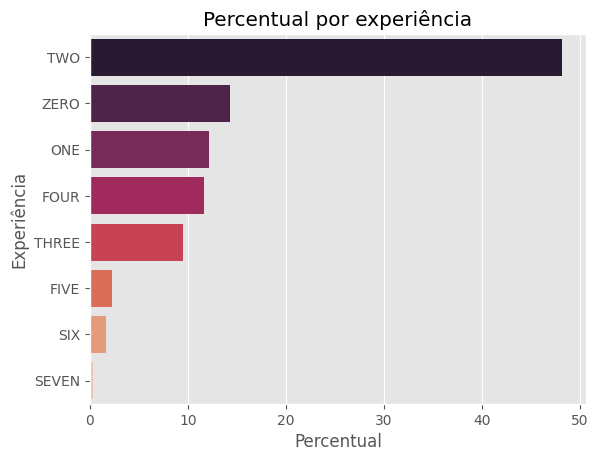

In [ ]:

df_agrouped_experience = df_agrouped_experience.sort_values('percentage',ascending=False)

sns.barplot(data=df_agrouped_experience,y='EXPERIENCE_LENGTH',x='percentage',palette='rocket')                                          
plt.title('Percentual por experiência')
plt.xlabel("Percentual")
plt.ylabel('Experiência')

Quando analisamos a média salarial, por tempo de experiência, percebemos pouca diferença entre 2 e 6 anos. Isso levanta a questão se é mesmo necessário tanta experiência para determinadas vagas.

Text(0, 0.5, 'Experiência')

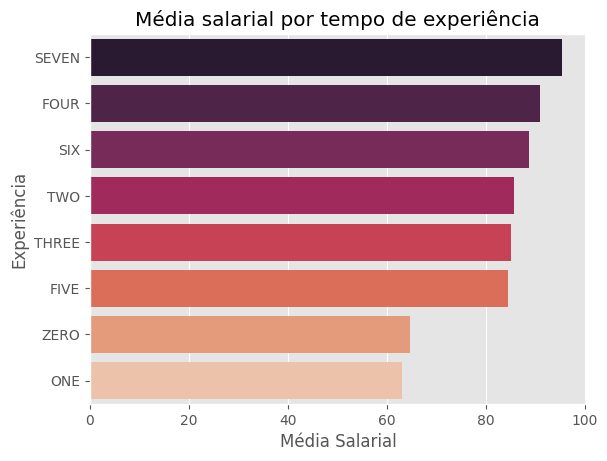

In [ ]:
df_agrouped_experience = df_agrouped_experience.sort_values('MediaSalarial',ascending=False)

sns.barplot(data=df_agrouped_experience,y='EXPERIENCE_LENGTH',x='MediaSalarial',palette='rocket')                                          
plt.title('Média salarial por tempo de experiência')
plt.xlabel("Média Salarial em milhares")
plt.ylabel('Experiência')

In [ ]:
#Agrupando dados por posição e tirando média salarial
df_agrouped_position = pd.DataFrame(df_job_class.groupby('Position').agg(MediaSalarial=('salary_start','mean'),MediaExperienca=('Experience_length_int','mean'))).reset_index()

Maiores salários por posição

Text(0, 0.5, 'Posição')

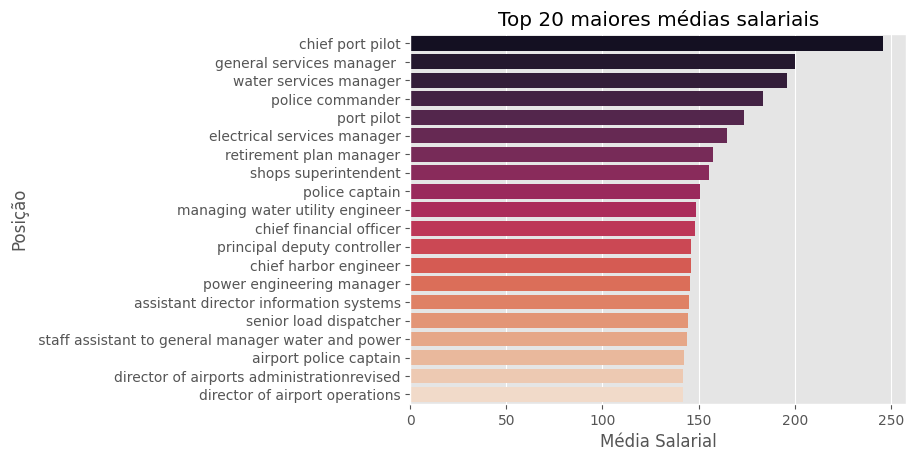

In [ ]:
df_agrouped_position_top20 = df_agrouped_position.sort_values('MediaSalarial',ascending=False).head(20)

sns.barplot(data=df_agrouped_position_top20,y='Position',x='MediaSalarial',palette='rocket')                                           
plt.title('Top 20 maiores médias salariais')
plt.xlabel("Média Salarial em milhares")
plt.ylabel('Posição')

Text(0, 0.5, 'Posição')

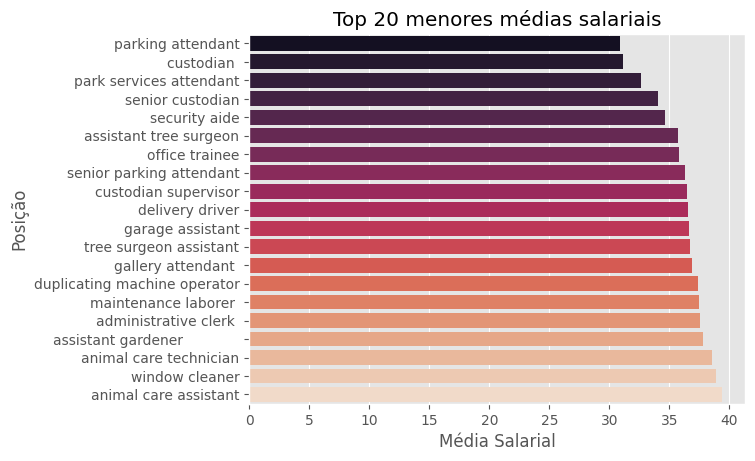

In [ ]:
df_agrouped_position_top20 = df_agrouped_position.sort_values('MediaSalarial',ascending=True).head(20)

sns.barplot(data=df_agrouped_position_top20,y='Position',x='MediaSalarial',palette='rocket')                                          
plt.title('Top 20 menores médias salariais')
plt.xlabel("Média Salarial em milhares")
plt.ylabel('Posição')

Text(0, 0.5, 'Setor')

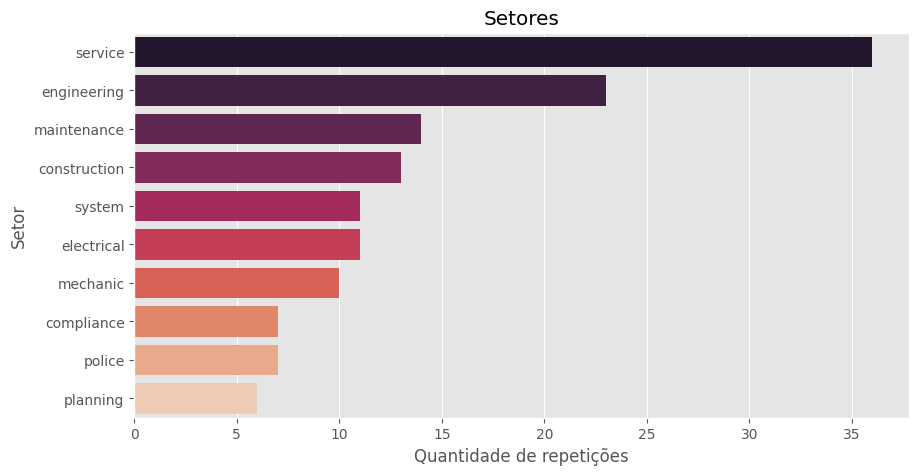

In [ ]:
#Tokenizar coluna Position para descobrir o Setor de atuação da vaga
wn = nltk.stem.WordNetLemmatizer()

plt.figure(figsize=(10,5))
excluir = ['senior','analyst','supervisor','supervisorsenior','assistant','communication','drafting','treatment','director','utility','clerk','animal','port','field','information','equipment','superintendent','techniciansenior','plant','management','repair','planning''engineersenior','lighting','supervisorprincipal','environmental','relation']
text=''.join(job for job in df_job_class['position_no_stopwords'])                                
text=nltk.word_tokenize(text)
text=[wn.lemmatize(normalize('NFKD', job).strip()) for job in text if wn.lemmatize(normalize('NFKD', job).strip()) not in excluir]
jobs=Counter(text)                                                        
jobs_class=pd.DataFrame([job for job in jobs.most_common(10)],columns=['Area','QtdRepeticoes'])          



sns.barplot(data=jobs_class,y='Area',x='QtdRepeticoes',palette='rocket')                                           
plt.title('Setores')
plt.xlabel("Quantidade de repetições")
plt.ylabel('Setor')  
 

In [ ]:
#função para retornar o setor de acordo com parametro de título da vaga e o parametro dos setores depois da tokenização
jobs_class=pd.DataFrame([job for job in jobs.most_common(10)],columns=['Area','QtdRepeticoes'])    
def setor_por_posicao(position):
  for setor in jobs_class.itertuples():
    
    if setor[1].upper() in position.upper():
      return setor[1]
  return 'outros'

df_job_class['Setor'] = df_job_class['requirements'].apply(setor_por_posicao)


Quantidade de vagas por setor

Text(0, 0.5, 'Setor')

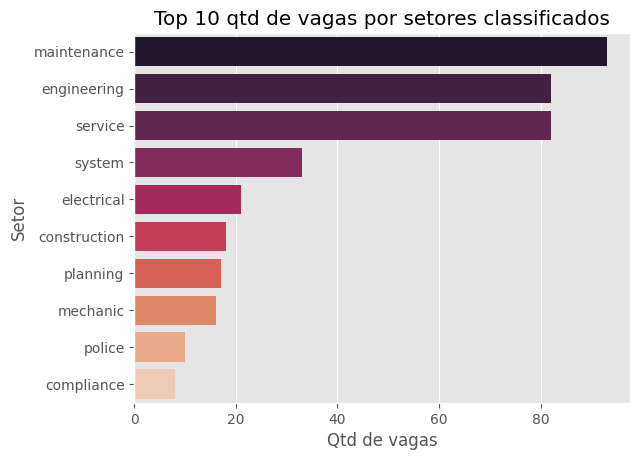

In [ ]:
#Agrupando dados por setor e tirando média salarial e quantidade
df_agrouped_position = pd.DataFrame(df_job_class[df_job_class['Setor']!='outros'].groupby('Setor').agg(MediaSalarial=('salary_start','mean'),QtdVagas=('AuxCount','sum'))).sort_values('QtdVagas',ascending=False).reset_index()


sns.barplot(data=df_agrouped_position,y='Setor',x='QtdVagas',palette='rocket')                                          
plt.title('Top 10 qtd de vagas por setores classificados')
plt.xlabel("Qtd de vagas")
plt.ylabel('Setor')

Média salarial por setor

Text(0, 0.5, 'Setor')

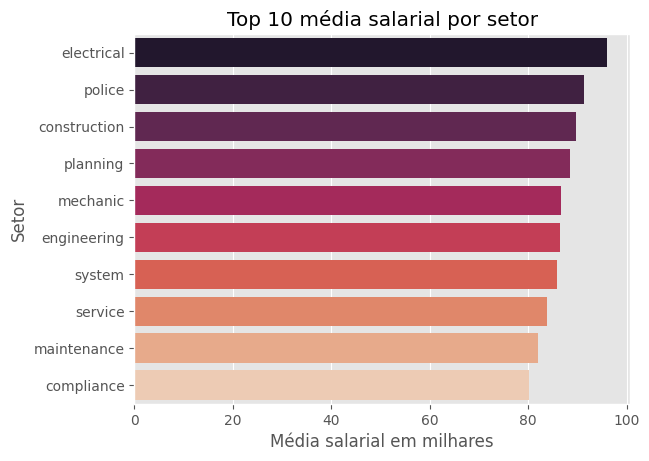

In [ ]:
#Agrupando dados por setor e tirando média salarial e quantidade
df_agrouped_position = pd.DataFrame(df_job_class[df_job_class['Setor']!='outros'].groupby('Setor').agg(MediaSalarial=('salary_start','mean'),QtdVagas=('AuxCount','sum'))).sort_values('MediaSalarial',ascending=False).reset_index()


sns.barplot(data=df_agrouped_position,y='Setor',x='MediaSalarial',palette='rocket')                                          
plt.title('Top 10 média salarial por setor')
plt.xlabel("Média salarial em milhares")
plt.ylabel('Setor')

Agrupar as vagas por setores, pode ajudar na busca realizada pelos candidatos

In [ ]:
print('De um total de {}, foi possível mapear o setor em {} registros'.format(str(len(df_job_class)),str(len(df_job_class[df_job_class['Setor']!='outros']))))

De um total de 660, foi possível mapear o setor em 380 registros


In [ ]:
#retorna dataframe com os empregos que possuem deveres similares para comparação, as entradas são a string com descrição do dever e um df com lista de deveres
def procurar_deveres_similares(dever_series):
    deveres=[]
    for dever in dever_series:
      word1=nltk.word_tokenize(dever)
      
      for i,name in enumerate(dever_series):
        word2=nltk.word_tokenize(name)
        distance=nltk.jaccard_distance(set(nltk.ngrams(word1,n=1)),set(nltk.ngrams(word2,n=1)))
        if(distance<.5 and distance > 0):
            deveres.append((dever,name,distance))
    return pd.DataFrame(deveres,columns=['Descricao','Descricao_Similar','Distancia']).sort_values('Distancia',ascending=False).reset_index()

In [ ]:
df_comparacao = procurar_deveres_similares(df_job_class['duties_no_stopwords'])

In [ ]:
#realiza join para obter a diferença salarial entre vagas com obrigações parecidas

df_join = df_comparacao
df_join.rename(columns = {'Descricao':'duties_no_stopwords'}, inplace = True)
df_join = df_job_class.join(df_join.set_index('duties_no_stopwords'),how='inner',on='duties_no_stopwords')[['duties','Position','duties_no_stopwords','Descricao_Similar','Distancia','salary_start']]
df_join.rename(columns = {'duties_no_stopwords':'Descricao'}, inplace = True)
df_join.rename(columns = {'salary_start':'salary_start1'}, inplace = True)
df_join.rename(columns = {'Position':'Position1'}, inplace = True)
df_join.rename(columns = {'duties':'duties1'}, inplace = True)
df_join.rename(columns = {'Descricao_Similar':'duties_no_stopwords'}, inplace = True)
df_join = df_job_class.join(df_join.set_index('duties_no_stopwords'),how='inner',on='duties_no_stopwords')[['duties1','duties','Position1','Position','duties_no_stopwords','Descricao','Distancia','salary_start1','salary_start']]
df_join.rename(columns = {'duties_no_stopwords':'Descricao_Similar'}, inplace = True)
df_join.rename(columns = {'salary_start':'salary_start2'}, inplace = True)
df_join.rename(columns = {'Position':'Position2'}, inplace = True)
df_join.rename(columns = {'duties':'duties2'}, inplace = True)
df_join['DiffSalario'] = abs(df_join['salary_start1'] - df_join['salary_start2'])
df_join = df_join.sort_values(['Distancia','DiffSalario'],ignore_index=True)

for i in range(len(df_join)):
  if i%2 == 1:
    df_join = df_join.drop(i)

df_join.head(10)

,duties1,duties2,Position1,Position2,Descricao_Similar,Descricao,Distancia,salary_start1,salary_start2,DiffSalario
0,A Wastewater Treatment Operator operates waste...,A Wastewater Treatment Operator operates waste...,wastewater treatment operator,wastewater treatment operator,A Wastewater Treatment Operator operates waste...,A Wastewater Treatment Operator operates waste...,0.018519,90.034,94.361,4.327
2,"A Senior Utility Services Specialist assigns, ...","A Senior Utility Services Specialist assigns, ...",senior utility services specialist,senior utility services specialist,A Senior Utility Services Specialist assigns r...,A Senior Utility Services Specialist assigns r...,0.042857,106.780,117.199,10.419
4,The Chief Safety Engineer Pressure Vessels pla...,A Senior Safety Engineer Pressure Vessels part...,chief safety engineer pressure vessels,senior safety engineer pressure vessels,A Senior Safety Engineer Pressure Vessels part...,The Chief Safety Engineer Pressure Vessels pla...,0.235294,102.646,85.086,17.560
6,A Port Electrical Mechanic performs all skille...,Works with and supervises a small group of Por...,port electrical mechanic,senior port electrical mechanic,Works supervises small group Port Electrical M...,A Port Electrical Mechanic performs skilled el...,0.250000,102.687,112.955,10.268
8,"A Senior Survey Supervisor assigns, reviews an...","A Payroll Supervisor assigns, reviews, and eva...",senior survey supervisor,payroll supervisor,A Payroll Supervisor assigns reviews evaluates...,A Senior Survey Supervisor assigns reviews eva...,0.266667,103.982,63.579,40.403
10,An Assistant Communications Cable Worker assis...,A Communications Cable Worker does skilled ele...,assistant communications cable worker,communications cable worker,A Communications Cable Worker skilled electric...,An Assistant Communications Cable Worker assis...,0.270833,52.096,58.401,6.305
12,A Senior Communications Cable Worker acts as l...,A Communications Cable Worker does skilled ele...,senior communications cable worker,communications cable worker,A Communications Cable Worker skilled electric...,A Senior Communications Cable Worker acts lead...,0.290909,89.784,58.401,31.383
14,A Senior Plumber acts as lead for and works wi...,"A Plumber does skilled work in the layout, ins...",senior plumber,plumber,A Plumber skilled work layout installation rep...,A Senior Plumber acts lead works small group p...,0.314286,99.012,94.445,4.567
16,A Cement Finisher Worker does semiskilled work...,"A Cement Finisher does skilled work in mixing,...",cement finisher worker,cement finisher,A Cement Finisher skilled work mixing placing ...,A Cement Finisher Worker semiskilled work mixi...,0.315789,48.211,79.244,31.033
18,"A Chief Clerk Personnel plans, coordinates, an...","A Principal Clerk plans, organizes, and dire...",chief clerk personnel,principal clerk,A Principal Clerk plans organizes directs work...,A Chief Clerk Personnel plans coordinates supe...,0.317073,65.751,54.120,11.631


Ao utilizar o algoritmo Jaccard de similaridade para comparar as obrigações das vagas, podemos extrair o indicador de diferença salarial entre vagas parecidas como as descrições de obrigações mais parecidas com diferenças salariais

<ipython-input-582-3bfbd6572852>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['CompararCargo'] = df_plot['Position1'] + ' x ' + df_plot['Position2']


Text(0, 0.5, 'Comparação de vagas')

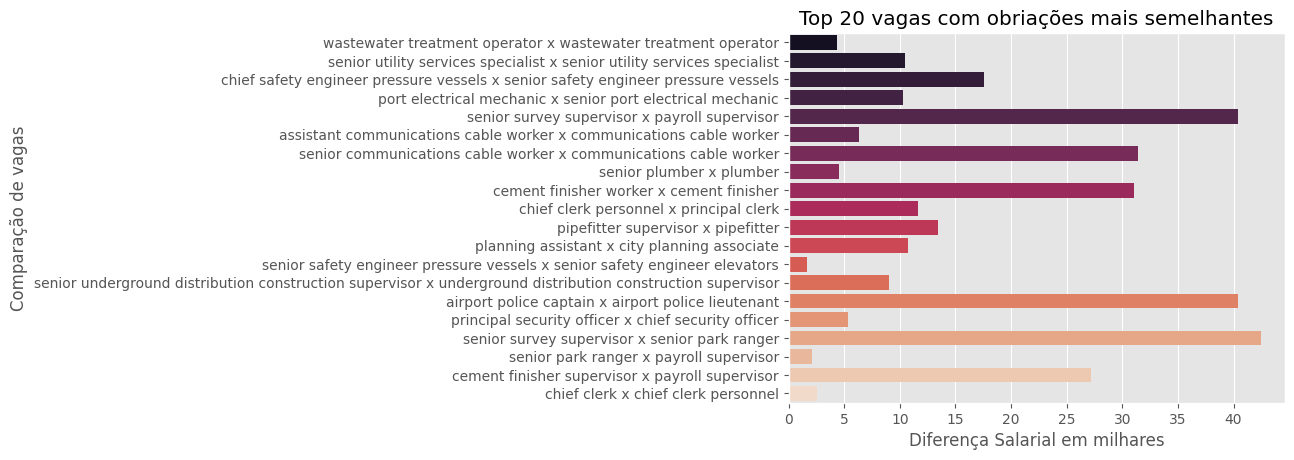

In [ ]:
df_plot = df_join.head(20)

df_plot['CompararCargo'] = df_plot['Position1'] + ' x ' + df_plot['Position2']

sns.barplot(data=df_plot,y='CompararCargo',x='DiffSalario',palette='rocket')                                           
plt.title('Top 20 vagas com obriações mais semelhantes')
plt.xlabel("Diferença Salarial em milhares")
plt.ylabel('Comparação de vagas') 

Também é possível extrair as maiores diferenças salariais de acordo com obrigações semelhantes

<ipython-input-583-f1c5c526e65c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['CompararCargo'] = df_plot['Position1'] + ' x ' + df_plot['Position2']


Text(0, 0.5, 'Comparação de vagas')

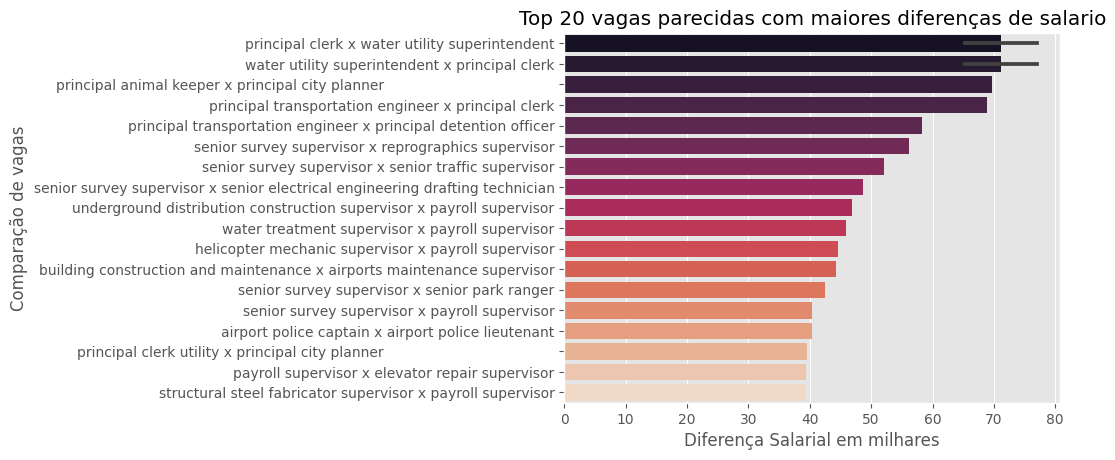

In [ ]:
df_join = df_join.sort_values(['DiffSalario'],ascending = False,ignore_index=True)

df_plot = df_join.head(20)

df_plot['CompararCargo'] = df_plot['Position1'] + ' x ' + df_plot['Position2']

sns.barplot(data=df_plot,y='CompararCargo',x='DiffSalario',palette='rocket')                                           
plt.title('Top 20 vagas parecidas com maiores diferenças de salario')
plt.xlabel("Diferença Salarial em milhares")
plt.ylabel('Comparação de vagas') 

Ao analisar no detalhe, é possível observar que a diferença salarial pode ser devido a data de abertura da vaga

In [ ]:
df_exemplo = df_job_class[df_job_class['Position'] == 'senior utility services specialist']
df_exemplo #neste exemplo duas vagas com obrigações parecidas foram abertas em épocas diferentes 2015 e 2018

,Unnamed: 0,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,selection,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,Experience_length_int,AuxCount,requirements_no_stopwords,duties_no_stopwords,position_no_stopwords
4,4,SENIOR UTILITY SERVICES SPECIALIST 3573 113018...,senior utility services specialist,117.199,145.596,2018-11-30,Two years of full-time paid experience with th...,"A Senior Utility Services Specialist assigns, ...",2018-12-13,"['Essay', 'Interview']",TWO,FULL_TIME,NaN,NaN,2,1,Two years full time paid experience City Los A...,A Senior Utility Services Specialist assigns r...,senior utility services specialist
41,41,SENIOR UTILITY SERVICES SPECIALIST 3753 121815...,senior utility services specialist,106.780,132.671,2015-12-18,Two years of full-time paid experience with th...,"A Senior Utility Services Specialist assigns, ...",2015-12-31,"['Essay', 'Test', 'Interview']",TWO,FULL_TIME,NaN,NaN,2,1,Two years full time paid experience City Los A...,A Senior Utility Services Specialist assigns r...,senior utility services specialist


Ou uma diferença de hierarquia como chefe e senior, com obrigações muito similares, necessitando talvez criar uma descrição melhor para diferenciar estes tipos de vaga

In [ ]:
df_exemplo1 = df_job_class[df_job_class['Position'] == 'chief safety engineer pressure vessels']
df_exemplo2 = df_job_class[df_job_class['Position'] == 'senior safety engineer pressure vessels']
df_exemplo = df_exemplo1.append(df_exemplo2)
df_exemplo #neste exemplo as obrigações entre chefe e senior são muito similares

<ipython-input-593-f61848d959ae>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_exemplo = df_exemplo1.append(df_exemplo2)


,Unnamed: 0,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,selection,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,Experience_length_int,AuxCount,requirements_no_stopwords,duties_no_stopwords,position_no_stopwords
326,326,CHIEF SAFETY ENGINEER PRESSURE VESSELS 4260 12...,chief safety engineer pressure vessels,102.646,127.493,2016-12-09,1. Two years of full-time paid experience in ...,The Chief Safety Engineer Pressure Vessels pla...,2017-02-13,['Interview'],TWO,FULL_TIME,NaN,NaN,2,1,1 Two years full time paid experience class le...,The Chief Safety Engineer Pressure Vessels pla...,chief safety engineer pressure vessels
175,175,SENIOR SAFETY ENGINEER PRESSURE VESSELS 4262 1...,senior safety engineer pressure vessels,85.086,124.382,2018-10-12,1. Two years of full-time paid experience as a...,A Senior Safety Engineer Pressure Vessels part...,2018-10-25,['Interview'],TWO,FULL_TIME,NaN,NaN,2,1,1 Two years full time paid experience Safety E...,A Senior Safety Engineer Pressure Vessels part...,senior safety engineer pressure vessels


Ao realizar este tipo de calculo de grau de similaridade, é possível indicar outras vagas similares das quais as pessoas podem se candidatar.

In [ ]:
print('De um total de {}, pelo menos {} possuem obrigações similares entre si'.format(str(len(df_job_class)),str(len(df_join))))

De um total de 660, pelo menos 148 possuem obrigações similares entre si


Referência Jaccard para recomendações:
https://ijaem.net/issue_dcp/Movie%20Recommendation%20by%20Using%20Jaccard%20Distance.pdf